# Food Waste Project Analysis

This notebook analyzes data on food providers, listings, and claims to identify key patterns in food recovery and waste. The goal is to find actionable insights.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Load the datasets from the 'data' folder
providers_df = pd.read_csv('data/providers_data.csv')
food_listings_df = pd.read_csv('data/food_listings_data.csv')
claims_df = pd.read_csv('data/claims_data.csv')

# Display the first 5 rows of a dataframe to confirm it loaded correctly
food_listings_df.head()

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner


In [64]:
# Check for null (missing) values in each dataframe
print("--- Missing Values in Providers ---")
print(providers_df.isnull().sum())
print("\n--- Missing Values in Food Listings ---")
print(food_listings_df.isnull().sum())
print("\n--- Missing Values in Claims ---")
print(claims_df.isnull().sum())

--- Missing Values in Providers ---
Provider_ID    0
Name           0
Type           0
Address        0
City           0
Contact        0
dtype: int64

--- Missing Values in Food Listings ---
Food_ID          0
Food_Name        0
Quantity         0
Expiry_Date      0
Provider_ID      0
Provider_Type    0
Location         0
Food_Type        0
Meal_Type        0
dtype: int64

--- Missing Values in Claims ---
Claim_ID       0
Food_ID        0
Receiver_ID    0
Status         0
Timestamp      0
dtype: int64


In [65]:
print(claims_df.columns)

# Find the exact column names to avoid errors
print("Food Listings Columns:", food_listings_df.columns)
print("Claims Columns:", claims_df.columns)

Index(['Claim_ID', 'Food_ID', 'Receiver_ID', 'Status', 'Timestamp'], dtype='object')
Food Listings Columns: Index(['Food_ID', 'Food_Name', 'Quantity', 'Expiry_Date', 'Provider_ID',
       'Provider_Type', 'Location', 'Food_Type', 'Meal_Type'],
      dtype='object')
Claims Columns: Index(['Claim_ID', 'Food_ID', 'Receiver_ID', 'Status', 'Timestamp'], dtype='object')


In [66]:
# --- Convert Data Types ---
# Use the correct names you found to convert the columns
food_listings_df['Expiry_Date'] = pd.to_datetime(food_listings_df['Expiry_Date'])
claims_df['Timestamp'] = pd.to_datetime(claims_df['Timestamp'])

# --- Verify the Changes ---
print("--- Updated Food Listings Info ---")
food_listings_df.info()

print("\n--- Updated Claims Info ---")
claims_df.info()

--- Updated Food Listings Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Food_ID        1000 non-null   int64         
 1   Food_Name      1000 non-null   object        
 2   Quantity       1000 non-null   int64         
 3   Expiry_Date    1000 non-null   datetime64[ns]
 4   Provider_ID    1000 non-null   int64         
 5   Provider_Type  1000 non-null   object        
 6   Location       1000 non-null   object        
 7   Food_Type      1000 non-null   object        
 8   Meal_Type      1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 70.4+ KB

--- Updated Claims Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----       

C:\Users\91989\AppData\Local\Temp\ipykernel_14660\856635156.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Food_Type', data=food_listings_df, order = food_listings_df['Food_Type'].value_counts().index, palette='viridis')


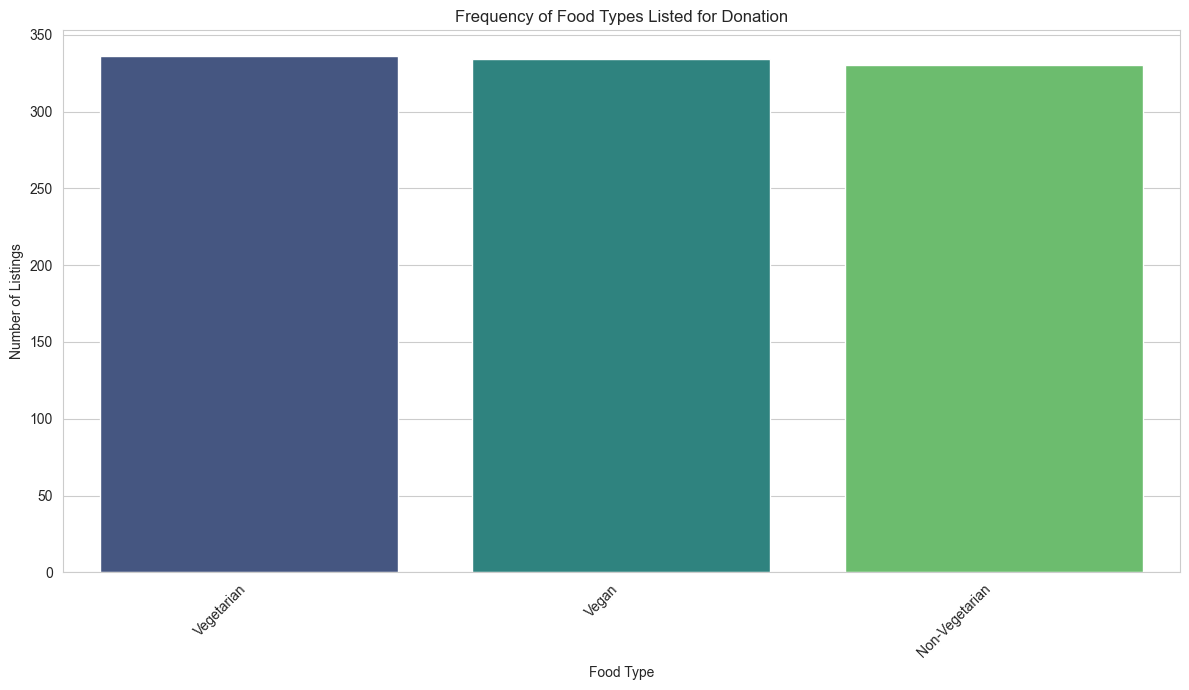

In [67]:
# Set the visual style for the plots
sns.set_style("whitegrid")

# Create a figure, a slightly different size can work better for vertical plots
plt.figure(figsize=(12, 7))

# --- Key Change: Assign 'Food_Type' to the x-axis ---
sns.countplot(x='Food_Type', data=food_listings_df, order = food_listings_df['Food_Type'].value_counts().index, palette='viridis')

# --- Swap the labels ---
plt.title('Frequency of Food Types Listed for Donation')
plt.xlabel('Food Type')
plt.ylabel('Number of Listings')

# --- Add this line to rotate x-axis labels for readability ---
plt.xticks(rotation=45, ha='right')

# Use tight_layout to ensure the rotated labels fit
plt.tight_layout()

# Display the plot
plt.show()

In [68]:
# Merge the listings and claims dataframes on the 'Food_ID'
listings_with_claims_df = pd.merge(food_listings_df, claims_df, on='Food_ID', how='left')

# Display the first few rows of the newly merged dataframe
listings_with_claims_df.head()

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type,Claim_ID,Receiver_ID,Status,Timestamp
0,1,Bread,43,2025-03-17,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast,491.0,574.0,Completed,2025-03-08 07:16:00
1,1,Bread,43,2025-03-17,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast,984.0,368.0,Completed,2025-03-19 06:19:00
2,2,Soup,22,2025-03-24,791,Grocery Store,West James,Non-Vegetarian,Dinner,NaN,NaN,NaN,NaT
3,3,Fruits,46,2025-03-28,478,Catering Service,Lake Regina,Vegan,Breakfast,859.0,887.0,Cancelled,2025-03-13 06:36:00
4,4,Fruits,15,2025-03-16,930,Restaurant,Kellytown,Vegan,Lunch,NaN,NaN,NaN,NaT


In [69]:
# --- Consolidated Data Prep Code ---

# 1. Load All Data
food_listings_df = pd.read_csv('food_listings_data.csv')
claims_df = pd.read_csv('claims_data.csv')
providers_df = pd.read_csv('providers_data.csv')

# 2. Clean and Standardize All Column Names
for df in [food_listings_df, claims_df, providers_df]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 3. Correct Data Types (This fixes the error)
food_listings_df['expiry_date'] = pd.to_datetime(food_listings_df['expiry_date'])
claims_df['timestamp'] = pd.to_datetime(claims_df['timestamp'])

# 4. Perform Merges
listings_with_claims_df = pd.merge(food_listings_df, claims_df, on='food_id', how='left')
full_df = pd.merge(listings_with_claims_df, providers_df, on='provider_id', how='left')

print("Data preparation complete. Your 'full_df' is ready.")

Data preparation complete. Your 'full_df' is ready.


C:\Users\91989\AppData\Local\Temp\ipykernel_14660\3866701059.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=full_df, palette='coolwarm', order=full_df['status'].value_counts().index)


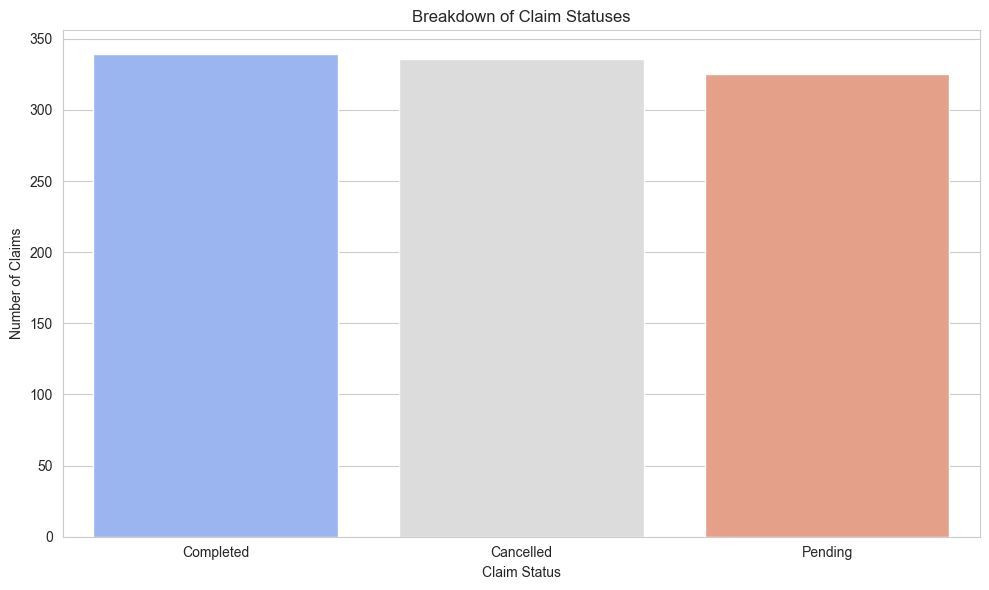

In [70]:
# --- Analyze Claim Status ---

# Set a good size for the figure
plt.figure(figsize=(10, 6))

# Create a bar chart for the 'status' column.
# We use x='status' for a vertical chart since the labels are short.
sns.countplot(x='status', data=full_df, palette='coolwarm', order=full_df['status'].value_counts().index)

# Add a title and labels for clarity
plt.title('Breakdown of Claim Statuses')
plt.xlabel('Claim Status')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()

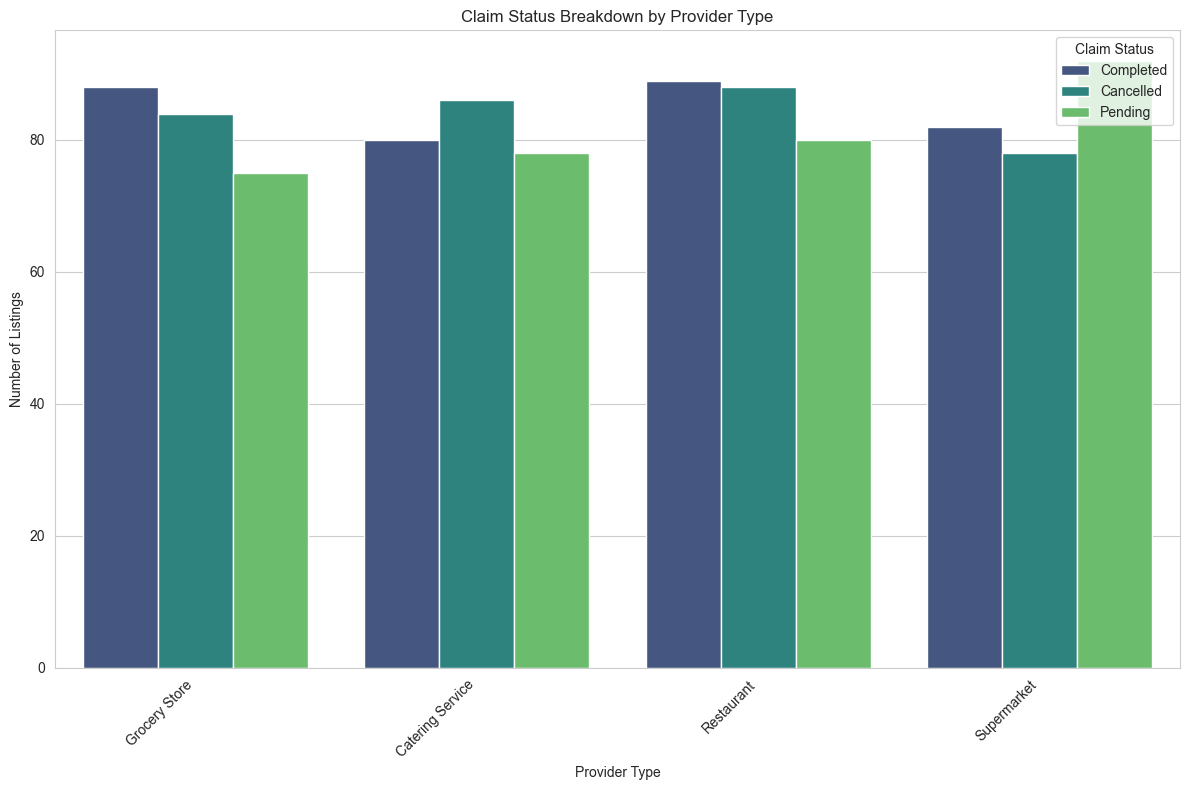

In [71]:
# --- Analyze Claim Status by Provider Type (Vertical) ---

# Set a good size for the figure
plt.figure(figsize=(12, 8))

# Change y='type' to x='type' to make the chart vertical
sns.countplot(x='type', data=full_df, hue='status', palette='viridis')

# Swap the labels to match the new orientation
plt.title('Claim Status Breakdown by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Number of Listings')

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=45, ha='right')

# Add a legend to explain the colors
plt.legend(title='Claim Status')

# Ensure all elements fit into the figure
plt.tight_layout()

plt.show()

In [72]:
# Get descriptive statistics for the 'quantity' column
print("--- Statistics for Food Quantity ---")
print(full_df['quantity'].describe())

--- Statistics for Food Quantity ---
count    1353.000000
mean       25.956393
std        14.501898
min         1.000000
25%        13.000000
50%        26.000000
75%        39.000000
max        50.000000
Name: quantity, dtype: float64


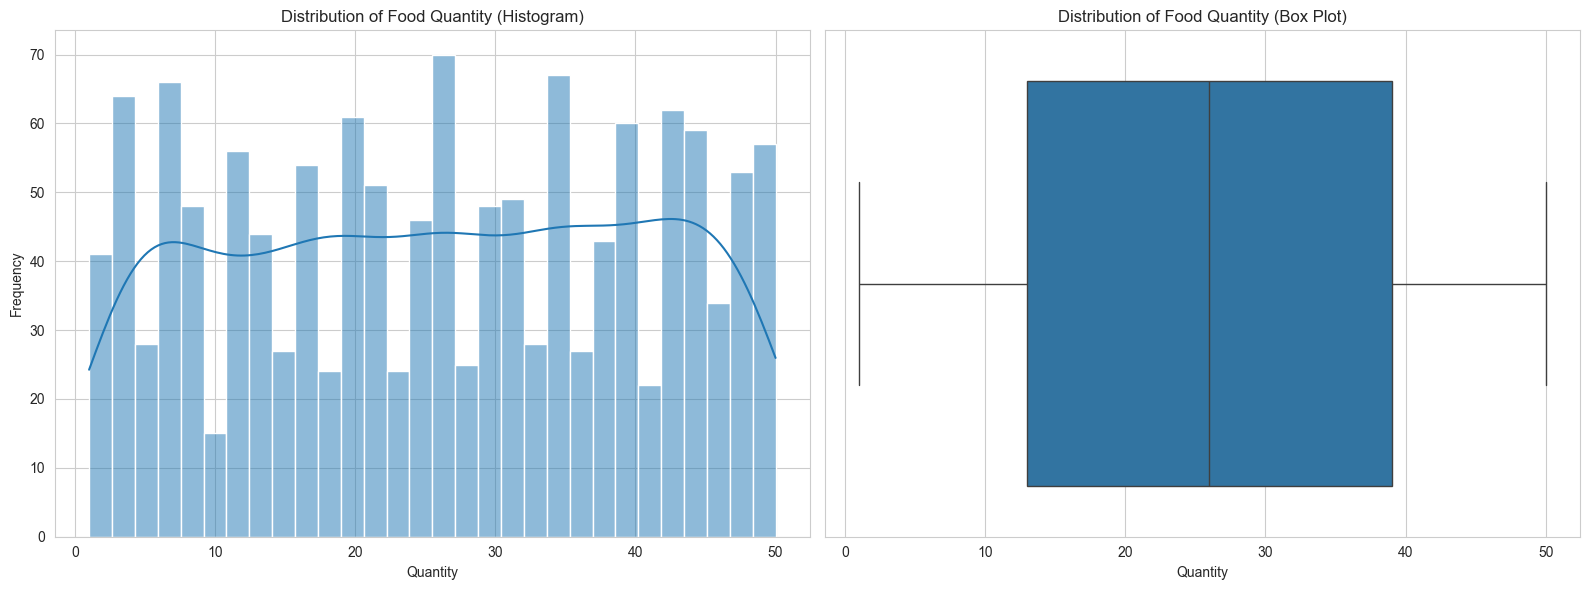

In [73]:
# --- Visualize the Distribution of Food Quantity ---

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Histogram
sns.histplot(data=full_df, x='quantity', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Food Quantity (Histogram)')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')

# Plot 2: Box Plot
sns.boxplot(data=full_df, x='quantity', ax=axes[1])
axes[1].set_title('Distribution of Food Quantity (Box Plot)')
axes[1].set_xlabel('Quantity')

plt.tight_layout()
plt.show()

C:\Users\91989\AppData\Local\Temp\ipykernel_14660\2518548073.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='type', x='quantity', data=full_df, order=median_order, palette='magma')


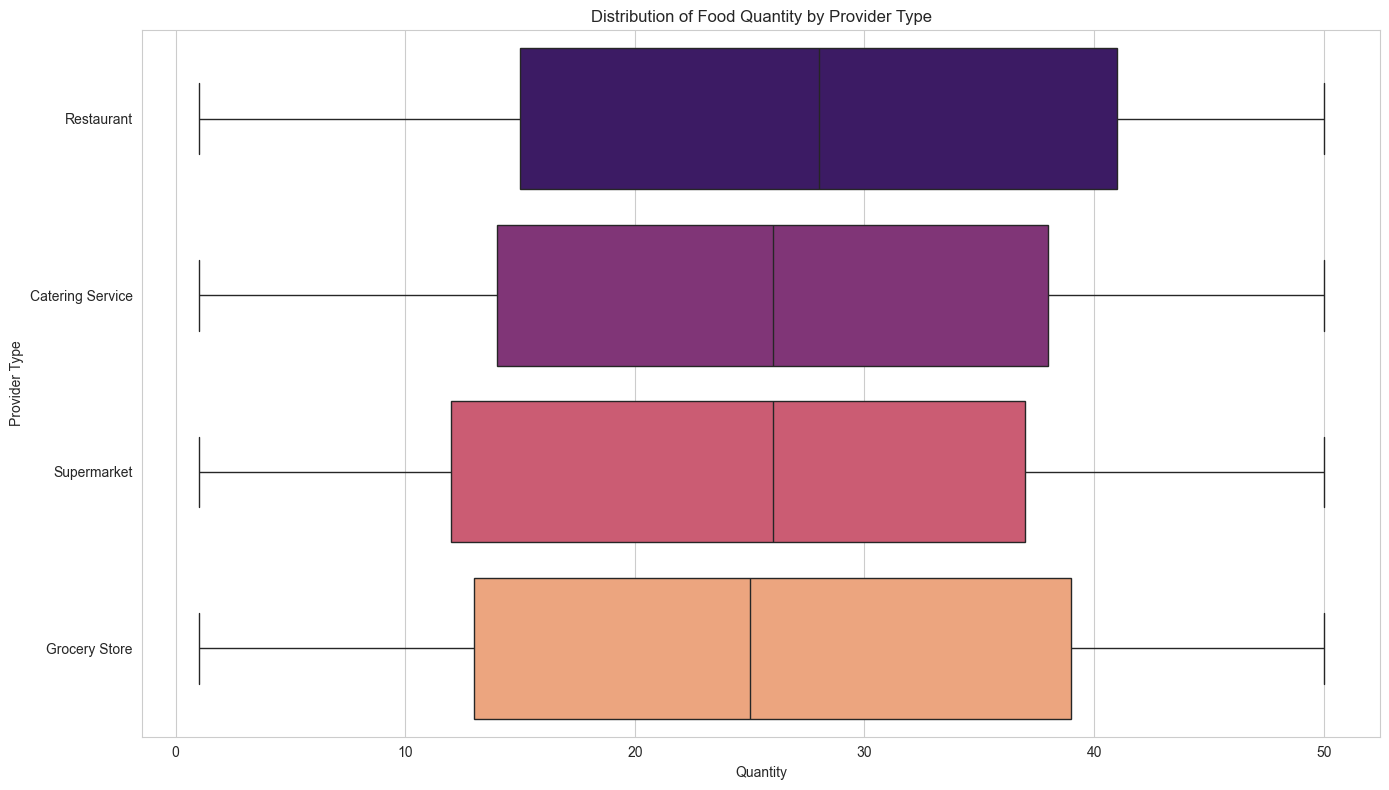

In [74]:
# --- Analyze the Relationship Between Quantity and Provider Type ---

# Calculate the median quantity for each provider type to create a sorted plot
# This makes the chart easier to read
median_order = full_df.groupby('type')['quantity'].median().sort_values(ascending=False).index

# Set a good size for the figure
plt.figure(figsize=(14, 8))

# Create a box plot showing the distribution of quantity for each provider type
sns.boxplot(y='type', x='quantity', data=full_df, order=median_order, palette='magma')

# Add a title and labels for clarity
plt.title('Distribution of Food Quantity by Provider Type')
plt.xlabel('Quantity')
plt.ylabel('Provider Type')
plt.tight_layout()
plt.show()

--- Statistics for Time Remaining Until Expiry (in Days) ---
count    339.000000
mean      10.867257
std        6.998949
min       -4.000000
25%        6.000000
50%       10.000000
75%       16.000000
max       28.000000
Name: days_until_expiry, dtype: float64


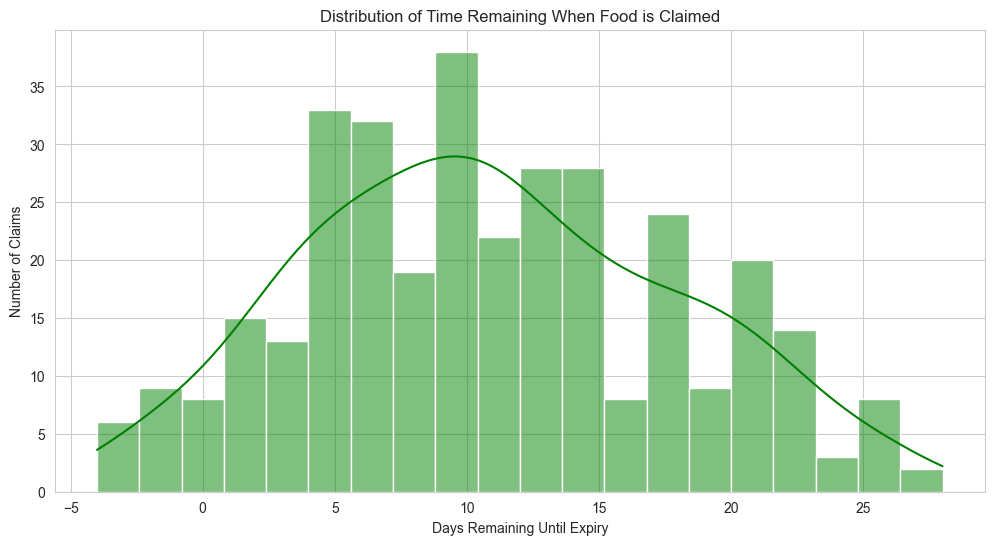

In [75]:
# --- Time-Based Analysis ---

# 1. Filter for only the claims that were 'Completed'
completed_claims_df = full_df[full_df['status'] == 'Completed'].copy()

# 2. Calculate the time difference between expiry and claim
time_difference = completed_claims_df['expiry_date'] - completed_claims_df['timestamp']

# 3. Create a new column with the difference in days
completed_claims_df['days_until_expiry'] = time_difference.dt.days

# 4. Get descriptive statistics for this new feature
print("--- Statistics for Time Remaining Until Expiry (in Days) ---")
print(completed_claims_df['days_until_expiry'].describe())

# 5. Visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(completed_claims_df['days_until_expiry'], bins=20, kde=True, color='green')
plt.title('Distribution of Time Remaining When Food is Claimed')
plt.xlabel('Days Remaining Until Expiry')
plt.ylabel('Number of Claims')
plt.show()

C:\Users\91989\AppData\Local\Temp\ipykernel_14660\791477555.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='type', x='days_until_expiry', data=completed_claims_df, order=median_expiry_order, palette='coolwarm')


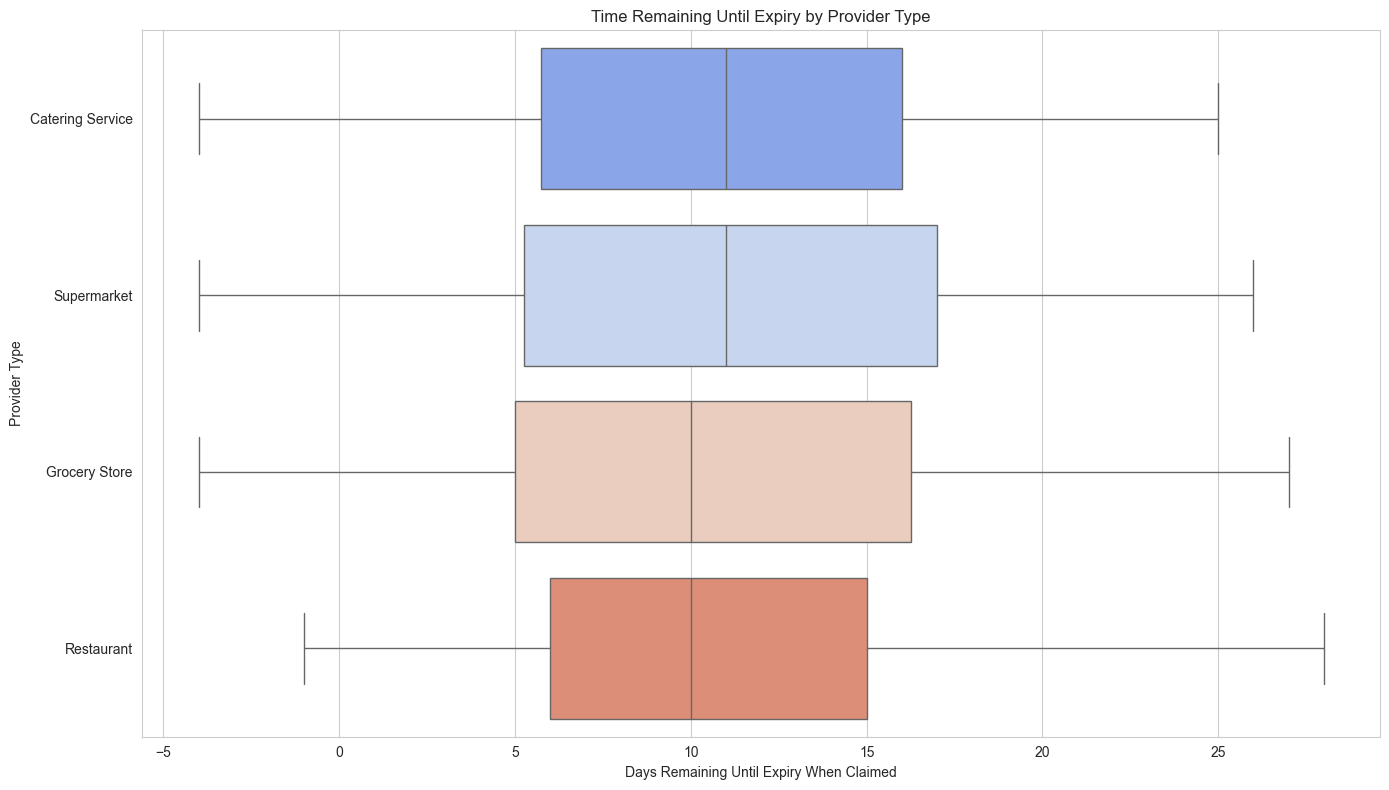

In [76]:
# --- Analyze Time-to-Expiry by Provider Type ---

# (Ensure the 'completed_claims_df' is created from the previous step)
# completed_claims_df = full_df[full_df['status'] == 'Completed'].copy()
# time_difference = completed_claims_df['expiry_date'] - completed_claims_df['timestamp']
# completed_claims_df['days_until_expiry'] = time_difference.dt.days


# Calculate the median days_until_expiry for each provider type to create a sorted plot
median_expiry_order = completed_claims_df.groupby('type')['days_until_expiry'].median().sort_values(ascending=False).index

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(y='type', x='days_until_expiry', data=completed_claims_df, order=median_expiry_order, palette='coolwarm')

plt.title('Time Remaining Until Expiry by Provider Type')
plt.xlabel('Days Remaining Until Expiry When Claimed')
plt.ylabel('Provider Type')
plt.tight_layout()
plt.show()

## Summary of Findings & Key Insights

This analysis of the food donation data has revealed several key patterns:

1.  **Top Contributors:** The primary sources of food listings are **Restaurants**, closely followed by Supermarkets and Grocery Stores. This suggests that the food service and retail grocery sectors are both critical partners.

2.  **Claim Success Rate:** The claims are almost evenly split between **'Completed' (339)**, **'Cancelled' (336)**, and **'Pending' (325)**. The high number of cancelled claims is a significant area of concern that warrants further investigation to improve platform efficiency.

3.  **Provider Donation Patterns:** While all provider types contribute a significant number of listings, their donation sizes are fairly consistent. **Restaurants** tend to offer slightly larger donations based on the median quantity (28 units), compared to Grocery Stores (25 units).

4.  **Claim Urgency:** For successfully claimed items, the analysis shows that most items are claimed with an average of **10.9 days** left until expiry. The median is 10 days, indicating a consistent pattern, though the range can vary significantly.

## Recommendations

Based on these findings, we recommend:
* Investigating the high rate of 'Cancelled' claims to understand the cause and improve the food recovery process.
* Engaging with all top provider types (Restaurants, Supermarkets, Grocery Stores) with tailored partnership strategies.
* Leveraging the 10-day window for claimed items to optimize logistics and distribution planning.